In [16]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP
import numpy as np

In [17]:
# data
cables = [(None, 3, 206), (None, 5, 287), (None, 7, 406)]

substations = np.array([[696, 1063],], dtype=float)
turbines = np.array(
    [[1940, 279], [1920, 703], [1475, 696], [1839, 1250],
     [1277, 1296], [442, 1359], [737, 435], [1060, 26],
     [522, 176], [87, 35], [184, 417], [71, 878]],
    dtype=float
)
border = np.array( # vertices oriented counter-clockwise
    [[1951, 200], [1951, 1383], [386, 1383], [650, 708], [624, 678],
     [4, 1036], [4, 3], [1152, 3], [917, 819], [957, 854]],
    dtype=float)
# 'obstacles' is an optional location attribute
obstacles = [
    # - vertices oriented clockwise for each obstacle polygon
    # - obstacles must be strictly inside the extents polygon
    # - undefined behavior if obstacles and extents borders overlap
    # first obstacle
    np.array([[1540, 920], [1600, 940], [1600, 1150], [1400, 1200]]),
    # [second obstacle] ...
]

In [18]:
# initialize the Heuristic router
router = Heuristic(solver='EW') # default is EW

In [19]:
# create wfn from coordinates
wfn = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles, cables=cables,router=router)
#wfn.plot_L()
#wfn.plot_A()


from_nodes: [11 -1 -1 -1  3  3  0  2  8  8  9  6]
to_nodes: [10  4  6  5  4  1  1  1 10  6 10  7]
lengths: [474.64723743 625.97923288 629.33695267 390.04102348 563.87941973
 552.96473667 424.47143602 445.05505277 415.12046444 336.60956611
 394.12307722 521.16216286]
loads: [1 5 6 1 4 3 1 1 3 4 1 1]
reverses: [False False False False  True  True  True False False False  True False]
cable_types: [0 1 2 0 1 0 0 0 0 1 0 0]
costs: [ 97777.3309106  179656.03983724 255510.80278532  80348.45083759
 161833.39346377 113910.73575392  87441.11582088  91681.34087152
  85514.81567541  96606.94547495  81189.35390801 107359.40554977]


<Axes: >

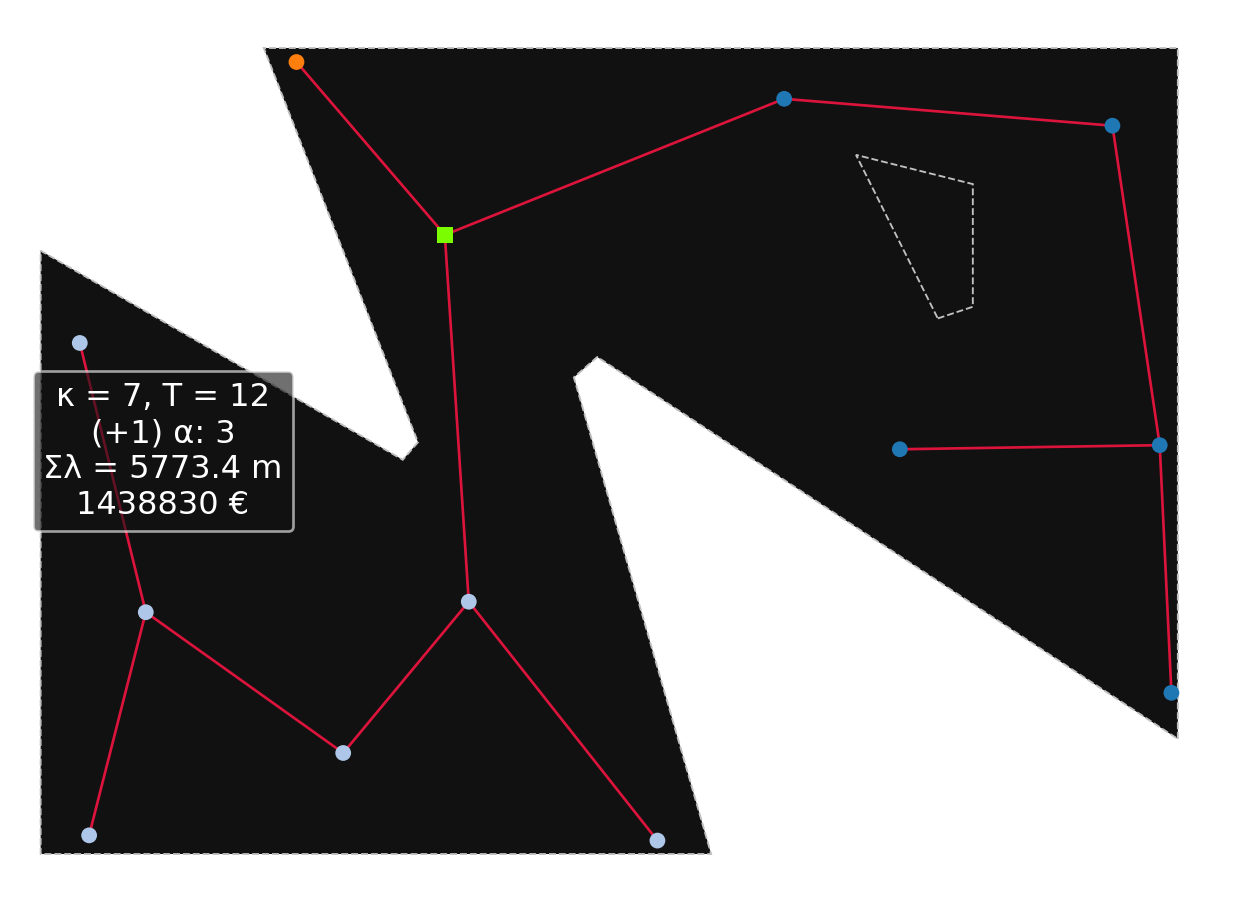

In [20]:
# Run optimization
from_nodes, to_nodes, lengths, loads, reverses, cable_types, costs = wfn.optimize()
print('from_nodes:', from_nodes)
print('to_nodes:', to_nodes)
print('lengths:', lengths)
print('loads:', loads)
print('reverses:', reverses)
print('cable_types:', cable_types)
print('costs:', costs)
# router should return array tree
#wfn.plot_L()
#wfn.plot_A()
#wfn.plot_G_tentative()
wfn.plot()

from_nodes: [11 -1 -1 -1  8  3  3  4  6  0  2  9  5]
to_nodes: [10  8  6 26 10  4  1  5  7  1  1 10 26]
lengths: [474.64723743 333.25665785 151.63772618 213.92522058 415.12046444
 563.87941973 552.96473667 837.37327399 521.16216286 424.47143602
 445.05505277 394.12307722 683.42153902]
loads: [1 4 2 6 3 4 3 5 1 1 1 1 6]
reverses: [False False False False False  True  True  True False  True False  True
  True]
cable_types: [0 1 0 2 0 1 0 1 0 0 0 0 2]
costs: [ 97777.3309106   95644.66080237  31237.37159237  86853.63955529
  85514.81567541 161833.39346377 113910.73575392 240326.12963638
 107359.40554977  87441.11582088  91681.34087152  81189.35390801
 277469.14484317]


<Axes: >

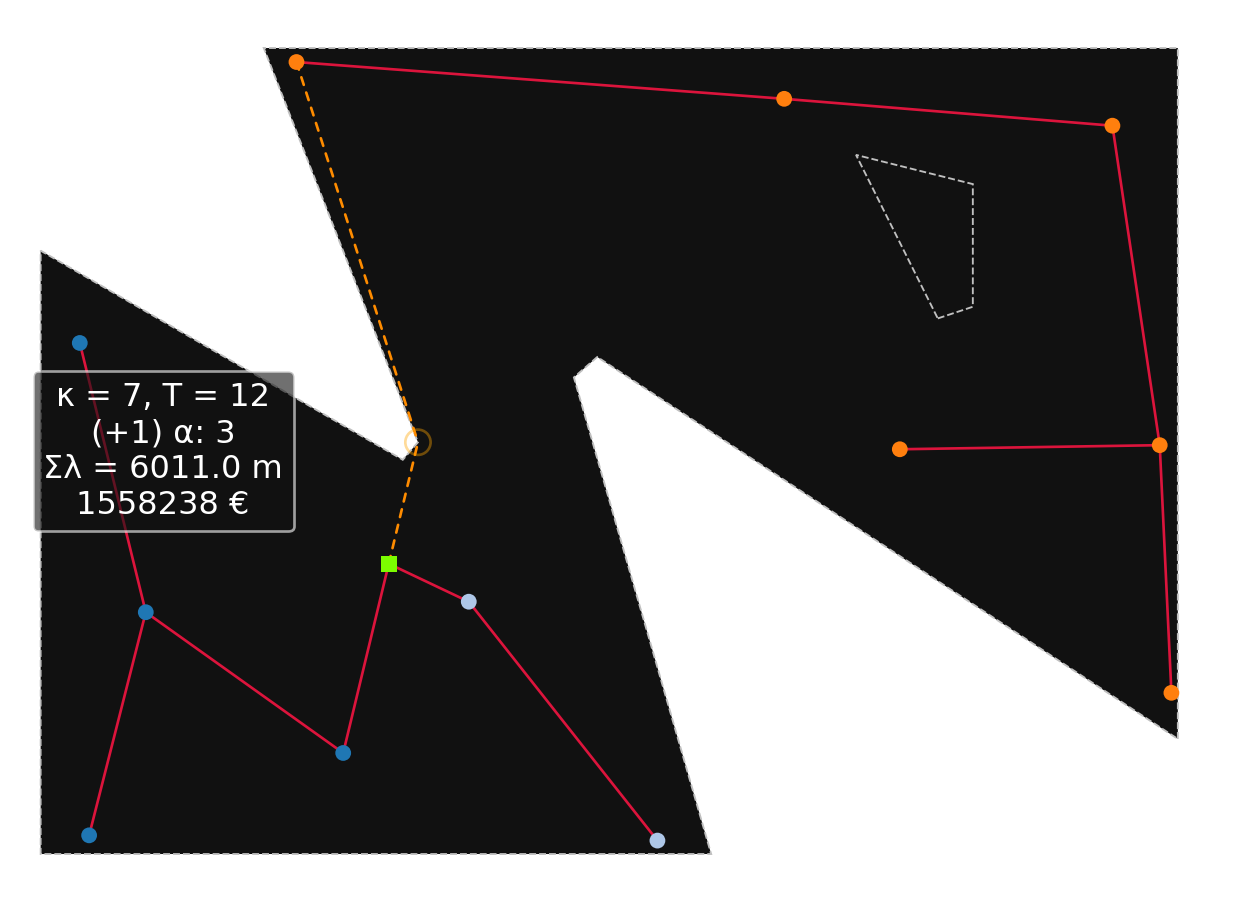

In [21]:
new_substations = np.array([[600, 500],], dtype=float)
from_nodes, to_nodes, lengths, loads, reverses, cable_types, costs = wfn.optimize(substations=new_substations)
print('from_nodes:', from_nodes)
print('to_nodes:', to_nodes)
print('lengths:', lengths)
print('loads:', loads)
print('reverses:', reverses)
print('cable_types:', cable_types)
print('costs:', costs)
wfn.plot()

In [22]:
print(wfn.G)
print(wfn.L.graph)
#wfn.plot_G_tentative()
#wfn.plot()

Graph with 14 nodes and 13 edges
{'T': 12, 'R': 1, 'VertexC': array([[1940.,  279.],
       [1920.,  703.],
       [1475.,  696.],
       [1839., 1250.],
       [1277., 1296.],
       [ 442., 1359.],
       [ 737.,  435.],
       [1060.,   26.],
       [ 522.,  176.],
       [  87.,   35.],
       [ 184.,  417.],
       [  71.,  878.],
       [1951.,  200.],
       [1951., 1383.],
       [ 386., 1383.],
       [ 650.,  708.],
       [ 624.,  678.],
       [   4., 1036.],
       [   4.,    3.],
       [1152.,    3.],
       [ 917.,  819.],
       [ 957.,  854.],
       [1540.,  920.],
       [1600.,  940.],
       [1600., 1150.],
       [1400., 1200.],
       [ 600.,  500.]]), 'B': np.int64(14), 'border': array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21]), 'obstacles': [array([22, 23, 24, 25])], 'name': '', 'handle': ''}


<Axes: >

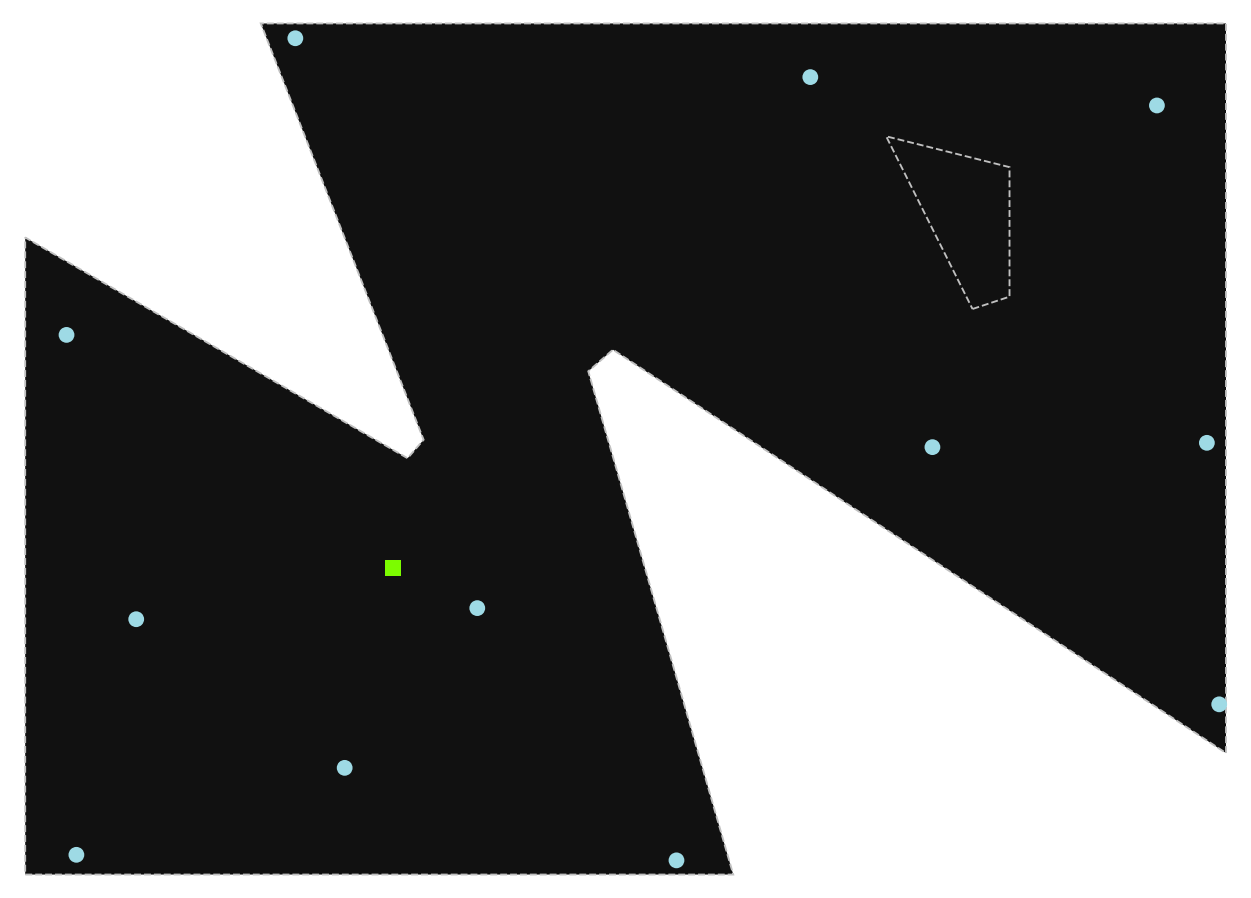

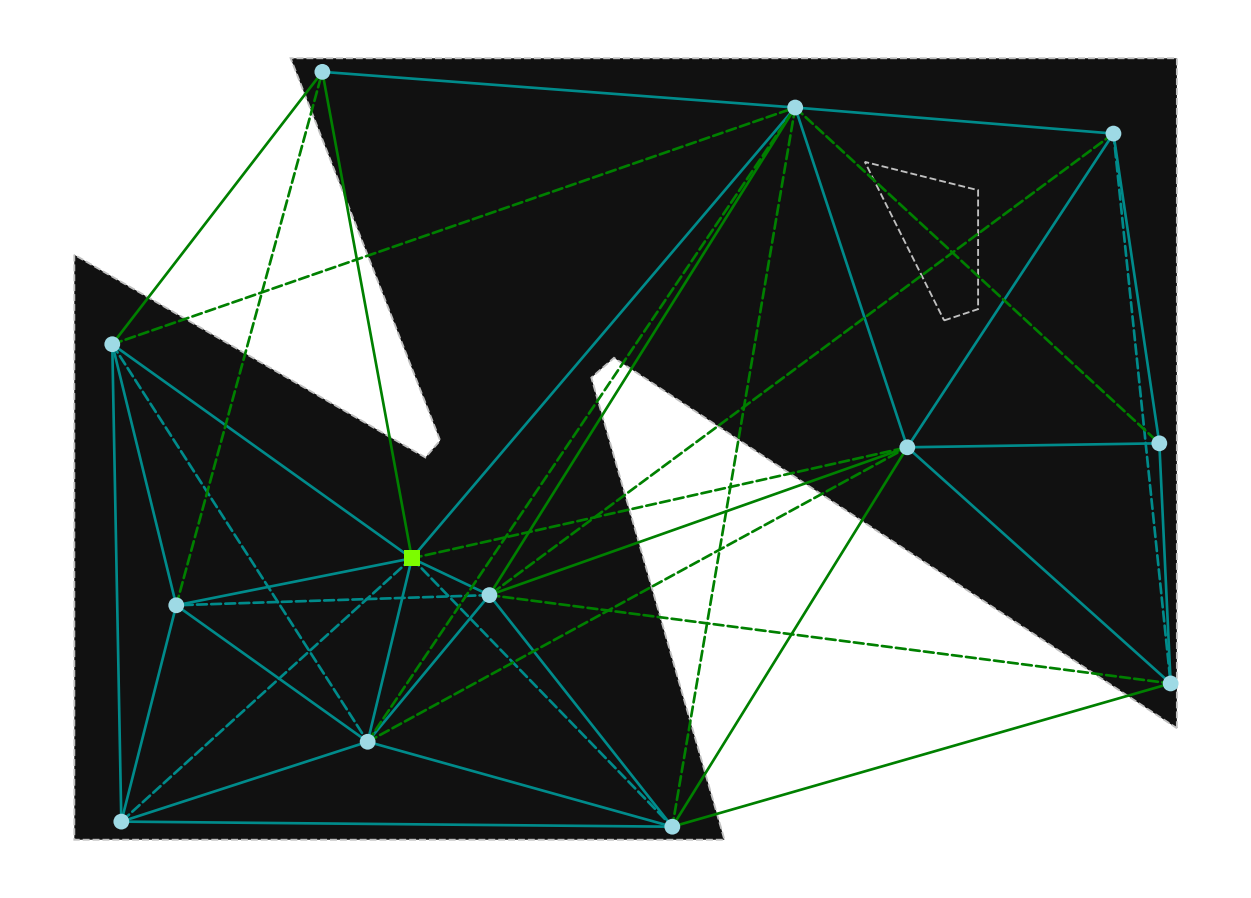

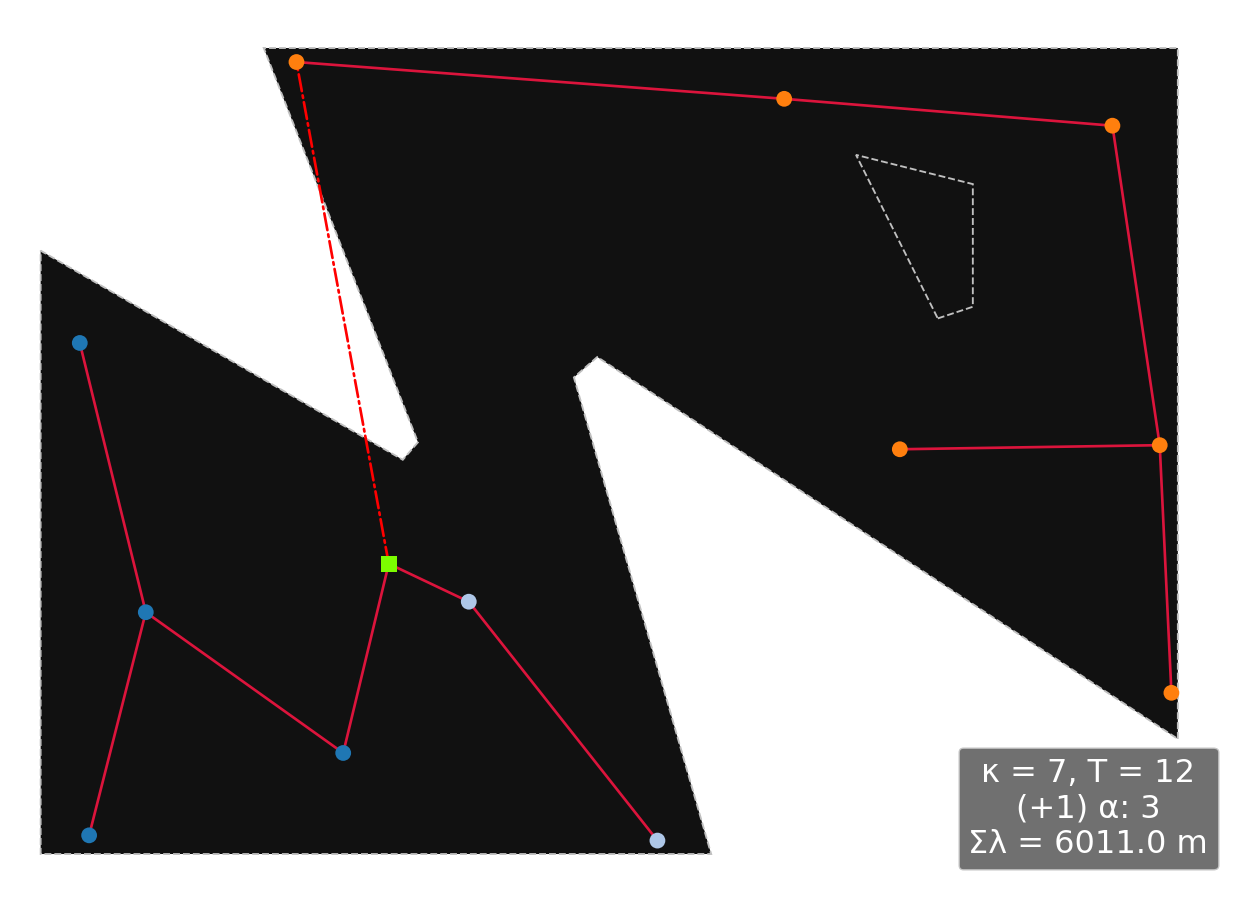

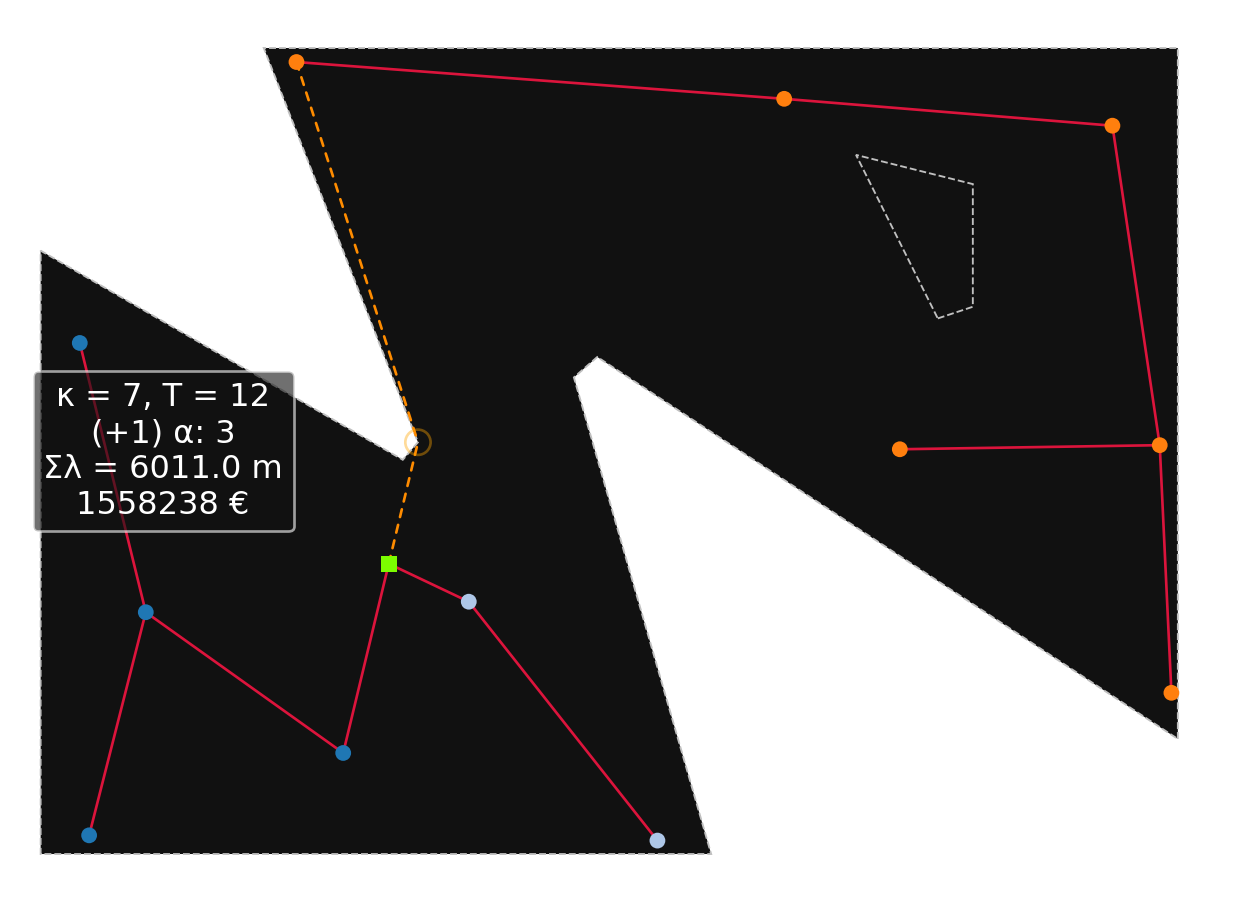

In [23]:
# set coordinate from the router
new_substations = np.array([[600, 500],], dtype=float)
wfn.optimize(substations=new_substations)

wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()

<Axes: >

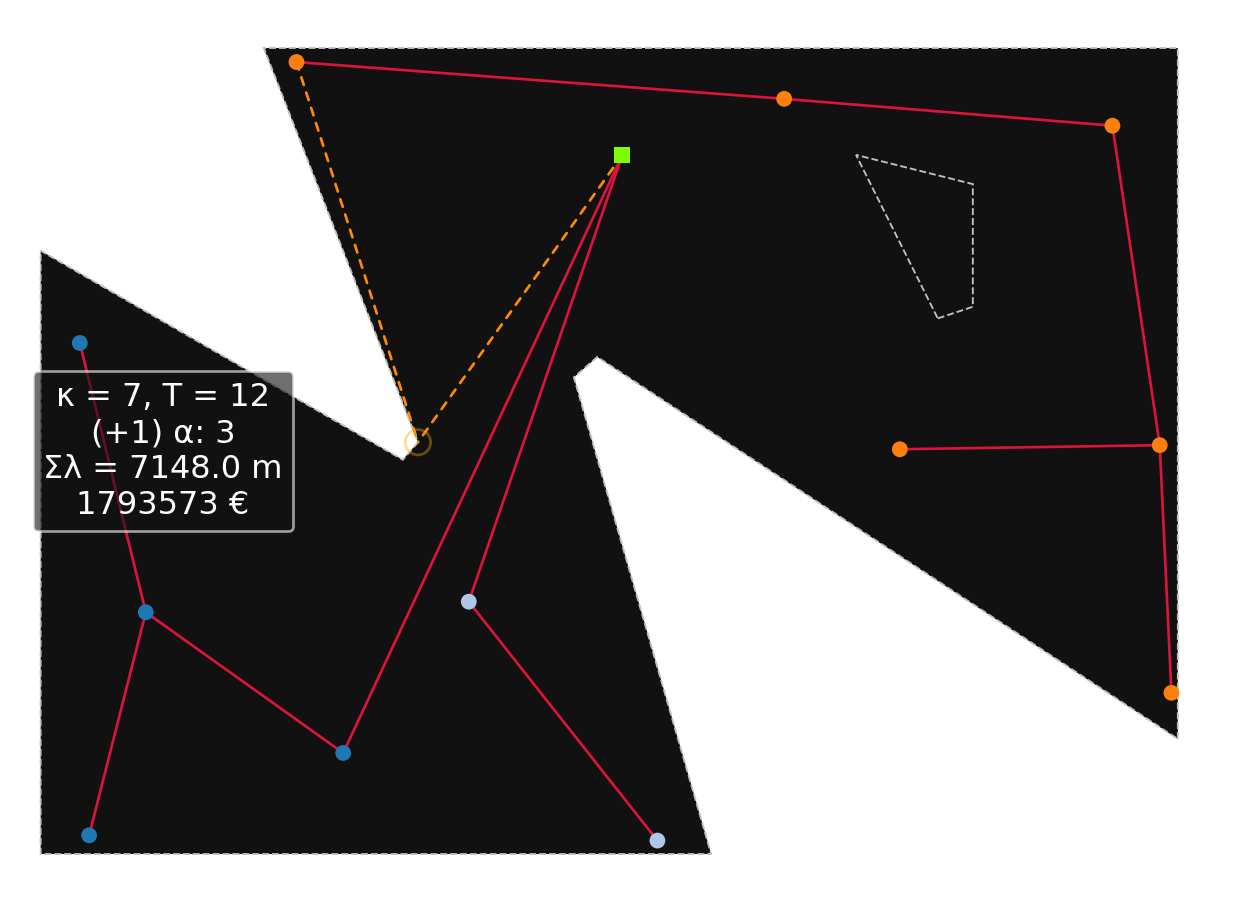

In [24]:
# set coordinate in wfn
new_substations = np.array([[1000, 1200],], dtype=float)
wfn.set_coordinates(turbines=turbines, substations=new_substations)
wfn.plot()


In [25]:
# Re-run optimizer with new coordinates
router()

wfn.plot_G_tentative()
wfn.plot()

TypeError: Heuristic.optimize() missing 1 required positional argument: 'L'

In [ ]:
# set network in wfn
net = wfn.get_network()
print(net)  # Check structure

# Convert tuples to lists
net = [list(edge) for edge in net]  

# Modify the first entry
net[0][1] = -1


# Convert back to tuples before setting the network
net = [tuple(edge) for edge in net]
print(net)
wfn.set_network(network_tree=net)
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()


In [ ]:
net_array = np.array([
    [3, 8, 840.488548, 4, 1, 1, 241220.213],
    [3, 1, 552.964737, 3, 1, 0, 113910.736],
    [-1, 4, 293.163777, 5, 0, 1, 84138.0039],
    [-1, 6, 808.946228, 6, 0, 2, 328432.169],
    [-1, 5, 580.211168, 1, 0, 0, 119523.501],
    [0, 1, 424.471436, 1, 1, 0, 87441.1158],
    [2, 1, 445.055053, 1, 0, 0, 91681.3409],
    [8, 10, 415.120464, 3, 0, 0, 85514.8157],
    [8, 6, 336.609566, 4, 0, 1, 96606.9455],
    [9, 10, 394.123077, 1, 1, 0, 81189.3539],
    [11, 10, 474.647237, 1, 0, 0, 97777.3309],
    [6, 7, 521.162163, 1, 0, 0, 107359.406]
], dtype=float)

# numpy record array type for each column

wfn.set_network_array(network_array=net_array)
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()

In [ ]:
net_array = np.array([
    [3, 6, 840.488548, 4, 1, 1, 241220.213],
    [3, 1, 552.964737, 3, 1, 0, 113910.736],
    [-1, 4, 293.163777, 5, 0, 1, 84138.0039],
    [-1, 6, 808.946228, 6, 0, 2, 328432.169],
    [-1, 5, 580.211168, 1, 0, 0, 119523.501],
    [0, 1, 424.471436, 1, 1, 0, 87441.1158],
    [2, 1, 445.055053, 1, 0, 0, 91681.3409],
    [8, 10, 415.120464, 3, 0, 0, 85514.8157],
    [8, 6, 336.609566, 4, 0, 1, 96606.9455],
    [9, 10, 394.123077, 1, 1, 0, 81189.3539],
    [11, 10, 474.647237, 1, 0, 0, 97777.3309],
    [6, 7, 521.162163, 1, 0, 0, 107359.406]
], dtype=float)

router(network_array=net_array)
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()

In [ ]:
# gradient
grad_wt, grad_ss = router.gradient()
print('gradients_wt:\n', grad_wt)
print('gradients_ss:\n', grad_ss)
print()
print('cost: ', wfn.cost())

In [ ]:
# update coordinates from router
new_substations = np.array([[600, 600],], dtype=float)
router(turbines=turbines, substations=new_substations)
# shall I make it work with only modified coordintates?

In [ ]:
wfn.plot_L()
wfn.plot_A()
wfn.plot_G_tentative()
wfn.plot()

In [ ]:
# gradient with new substation
grad_wt, grad_ss = router.gradient()
print('gradients_wt:\n', grad_wt)
print('gradients_ss:\n', grad_ss)
print()
print('cost: ', wfn.cost())

In [ ]:
New_network = [(1, 1, {'length': np.float64(474.6472374300729), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(97777.33091059502)}),
               (1, 1, {'length': np.float64(627.251943002172), 'load': 5, 'reverse': False, 'cable': 1, 'cost': np.float64(180021.30764162337)}),
               (1, 1, {'length': np.float64(616.1120028046848), 'load': 6, 'reverse': False, 'cable': 2, 'cost': np.float64(250141.47313870204)}),
               (1, 1, {'length': np.float64(402.54813376787627), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(82924.91555618252)}),
               (1, 1, {'length': np.float64(563.8794197343967), 'load': 4, 'reverse': True, 'cable': 1, 'cost': np.float64(161833.39346377185)}),
               (1, 1, {'length': np.float64(552.9647366695276), 'load': 3, 'reverse': True, 'cable': 0, 'cost': np.float64(113910.7357539227)}),
               (1, 1, {'length': np.float64(424.471436023674), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(87441.11582087685)}),
               (1, 1, {'length': np.float64(445.05505277437305), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(91681.34087152085)}),
               (1, 1, {'length': np.float64(415.12046444375636), 'load': 3, 'reverse': False, 'cable': 0, 'cost': np.float64(85514.8156754138)}),
               (1, 1, {'length': np.float64(336.60956611480907), 'load': 4, 'reverse': False, 'cable': 1, 'cost': np.float64(96606.9454749502)}),
               (1, 1, {'length': np.float64(394.12307722334657), 'load': 1, 'reverse': True, 'cable': 0, 'cost': np.float64(81189.35390800939)}),
               (1, 1, {'length': np.float64(521.1621628629615), 'load': 1, 'reverse': False, 'cable': 0, 'cost': np.float64(107359.40554977008)})]
#wfn.G.edges()
#wfn.set_network(network_tree=New_network)
#wfn.plot()
grad_wt, grad_ss = router.gradient(network_tree=New_network)



In [ ]:
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())


In [ ]:
# MILP
wfn2 = WindFarmNetwork(turbines=turbines, substations=substations, border=border, obstacles=obstacles, cables=cables)
router2 = MILP(wfn=wfn2) # default is EW
router2()
grad_wt, grad_ss = router2.gradient()

In [ ]:
print('gradients_wt\n', grad_wt)
print('gradients_ss\n', grad_ss)
print()
print('cost: ', wfn.cost())

In [ ]:
wfn2.plot()

In [ ]:
wfn3 = WindFarmNetwork.from_yaml(filepath="C:/code/OptiWindNet/docs/notebooks/data/example_location.yaml")

In [ ]:
wfn4 = WindFarmNetwork.from_windIO(filepath="C:/code/OptiWindNet/docs/notebooks/data/IEA37_Borssele_Regular_System.yaml")